# Modelowanie w `scikit-learn`
## Dzielenie danych na zbiór treningowy i testowy

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

iris = pd.read_csv("iris.csv")
X = iris.drop(columns="variety")
y = iris.variety

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=2)

## Skalowanie danych

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Tworzenie modelu i testowanie

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       1.00      0.83      0.91        12
   Virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## Zadania
1. Przypisz następujące przykłady do klasy A lub B przy użyciu metody k-NN z k=3. 
    - Zbiór treningowy: A(1, 3), A(2, 1), A(2, 3), B(4, 3), B(6, 3).
    - Przykłady do zaklasyfikowania: (1, 5), (5, 1), (2, 6), (3, 4).
2. Klasyfikuj przypadki ze zbioru `wdbc.data` jako `M` - *malignant* lub `B` - *benign*.
    - Podziel dane na zbiór treningowy i testowy. Ze zbioru treningowego wydziel dodatkowo zbiór walidacyjny.
    - Użyj k-NN do klasyfikacji przykładów ze zbioru walidacyjnego na podstawie pozostałych danych treningowych i wypisz dokładność, precyzję, pełność, F-miarę (zob. [metrics](https://scikit-learn.org/stable/modules/classes.html#classification-metrics), [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)). Warto wypisać też macierz omyłek ([`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)).
    - Sprawdź, jaki wpływ na dokładność ma skalowanie danych. Pamiętaj, że skalować należy także dane walidacyjne/testowe.
    - Stwórz wykres zależności dokładności od k. Skorzystaj ze zbioru walidacyjnego.
    - Wybierz najlepszy model i podaj jego dokładność dla danych testowych.
3. Wykorzystaj `KNeighborsRegressor` do predykcji cen domów (`medv`) ze zbioru `boston`. Wykonaj kroki analogicznie jak w Zadaniu 2. Do ewaluacji modelu można stosować np. miarę MSE (zob. [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

### Zadanie 2

In [4]:
wdbc = pd.read_csv("wdbc.data")
wdbc.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [6]:
X = wdbc.drop(columns="diagnosis")
y = wdbc.diagnosis

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=24)

In [ ]:
import matplotlib.pyplot as plt

def knn(X_train, y_train, X_valid, y_valid, k_from=1, k_to=10, scale=False, graph=False) -> None:
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.fit_transform(X_valid)
        
    accuracies = {}
    
    for k in range(k_from, k_to + 1, 1):
        knn = KNeighborsClassifier(k)
        knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_valid)
            
        if graph:
            accuracies[k] = classification_report(y_valid, y_pred, output_dict=True)["accuracy"]
    
    if graph:
        plt.plot(accuracies.keys(), accuracies.values())
        plt.title("Accuracy")
        plt.xlabel("k")
        plt.ylabel("accuracy")

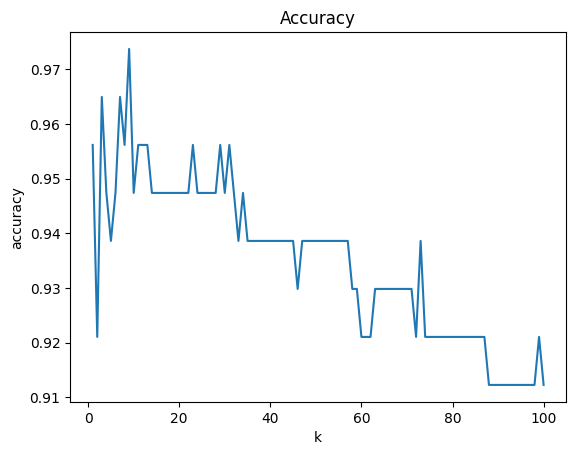

In [56]:
knn(X_train, y_train, X_valid, y_valid, k_from=1, k_to=100, scale=False, graph=True)

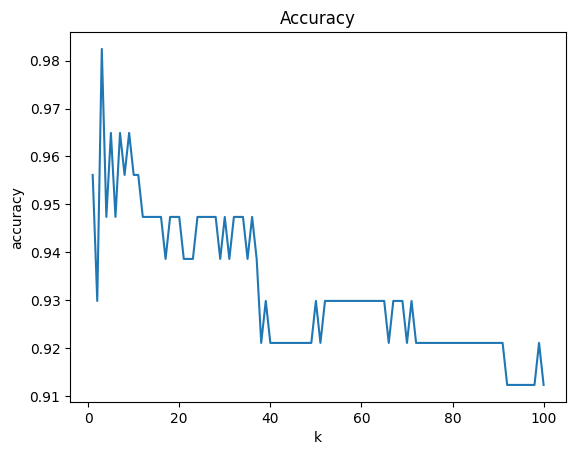

In [59]:
knn(X_train, y_train, X_valid, y_valid, k_from=1, k_to=100, scale=True, graph=True)

### Zadanie 3

In [60]:
boston = pd.read_csv("boston.csv")
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [64]:
X = boston.drop(columns=["medv"])
y = boston.medv

In [65]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=24)

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

def knr(X_train, y_train, X_valid, y_valid, k_from=1, k_to=10, scale=False, graph=False):
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.fit_transform(X_valid)
        
    mses = {}
        
    for k in range(k_from, k_to+  1, 1):
        knr = KNeighborsRegressor(k)
        knr.fit(X_train, y_train)
        
        y_pred = knr.predict(X_valid)
        
        if graph:
            mses[k] = mean_squared_error(y_valid, y_pred)
    
    if graph:
        plt.plot(mses.keys(), mses.values())
        plt.title("Mean Squared Error")
        plt.xlabel("k")
        plt.ylabel("mse")

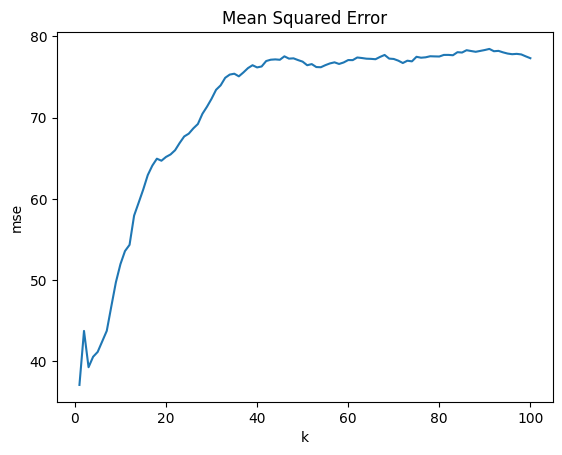

In [67]:
knr(X_train, y_train, X_valid, y_valid, k_from=1, k_to=100, scale=False, graph=True)

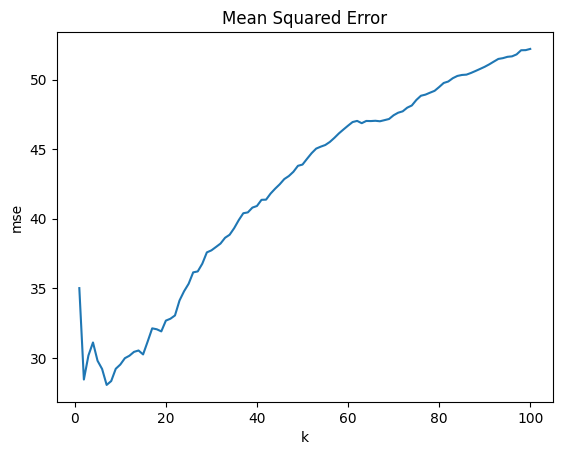

In [68]:
knr(X_train, y_train, X_valid, y_valid, k_from=1, k_to=100, scale=True, graph=True)